In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Loading data from source
high = pd.read_csv('data/highp_finalresults.csv')
low = pd.read_csv('data/lowp_finalresults.csv')
high.head()

,ident,it,t,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0,199993,20000001.0,0.030237,0.004911,1.904923,1.9029824602178687,4.368174e+32,59.88237,1.110726,51.287674,0.13,1.0,0.3,1.0,0.1,0.07707,9268935.0
1,0,199993,20000001.0,0.818832,0.000238,1.642056,1.8150047639338782,4.368174e+32,59.88237,1.110726,51.287674,0.13,1.0,0.3,1.0,0.1,0.07707,9268935.0
2,0,199993,20000001.0,2.124022,0.000000,1.786051,1.8659921485803184,4.368174e+32,59.88237,1.110726,51.287674,0.13,1.0,0.3,1.0,0.1,0.07707,9268935.0
3,0,199993,20000001.0,5.123330,0.000000,0.843418,1.4538852266916131,4.368174e+32,59.88237,1.110726,51.287674,0.13,1.0,0.3,1.0,0.1,0.07707,9268935.0
4,0,199993,20000001.0,6.932367,0.000000,0.477013,1.2031125383842882,4.368174e+32,59.88237,1.110726,51.287674,0.13,1.0,0.3,1.0,0.1,0.07707,9268935.0


In [3]:
low.tail()

,ident,it,t,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
31813,2974,199890,20000001.0,4.495716,0.0,0.594153,1.2944807364978042,4.092467e+32,50.698605,6.853647,9.907135,0.018,1.0,0.1,1.0,0.1,0.408212,7710610.5
31814,2974,199890,20000001.0,5.055471,0.0,0.374487,1.1100260808524707,4.092467e+32,50.698605,6.853647,9.907135,0.018,1.0,0.1,1.0,0.1,0.408212,7710610.5
31815,2974,199890,20000001.0,5.741148,0.0,0.254932,0.97674134618047792,4.092467e+32,50.698605,6.853647,9.907135,0.018,1.0,0.1,1.0,0.1,0.408212,7710610.5
31816,2974,199890,20000001.0,6.215687,0.0,0.111676,0.74183642795434679,4.092467e+32,50.698605,6.853647,9.907135,0.018,1.0,0.1,1.0,0.1,0.408212,7710610.5
31817,2974,199890,20000001.0,7.612730,0.0,0.064155,0.61682163672276424,4.092467e+32,50.698605,6.853647,9.907135,0.018,1.0,0.1,1.0,0.1,0.408212,7710610.5


In [4]:
high.describe()

,ident,it,t,a(i),emegas(i),emepla(i)/emet,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
count,32465.000000,32465.000000,32465.0,32465.000000,3.246500e+04,32465.000000,3.246500e+04,32465.000000,32465.000000,32465.000000,32465.000000,32465.0,32465.0,32465.0,3.246500e+04,32465.000000,3.246500e+04
mean,1483.424457,197467.410966,20000001.0,3.400574,7.167241e+00,7.630333,5.749874e+32,45.545752,5.963431,32.194985,0.043325,1.0,0.3,1.0,1.000000e-01,-0.001367,3.801387e+06
std,859.799152,8122.269582,0.0,3.696724,2.198142e+02,219.589599,2.784088e+32,8.270644,4.245843,33.406671,0.039576,0.0,0.0,0.0,5.721900e-14,0.211647,2.503500e+06
min,0.000000,9292.000000,20000001.0,0.002813,0.000000e+00,0.050002,2.005149e+32,25.340290,1.007152,1.515903,0.003100,1.0,0.3,1.0,1.000000e-01,-0.688720,1.001011e+06
25%,739.000000,198311.000000,20000001.0,0.913345,0.000000e+00,0.098376,3.379212e+32,39.816555,2.955550,12.484508,0.019000,1.0,0.3,1.0,1.000000e-01,-0.145420,1.687664e+06
50%,1484.000000,199620.000000,20000001.0,2.140342,0.000000e+00,0.229774,5.161603e+32,44.740940,4.808668,21.058982,0.030000,1.0,0.3,1.0,1.000000e-01,0.000306,2.998146e+06
75%,2227.000000,199907.000000,20000001.0,4.670935,2.295691e-10,0.669832,7.774028e+32,50.544758,7.681329,39.672398,0.054000,1.0,0.3,1.0,1.000000e-01,0.143216,5.405266e+06
max,2974.000000,199999.000000,20000001.0,37.368091,1.963193e+04,19634.764964,1.198218e+33,91.153824,48.223476,372.454042,0.320000,1.0,0.3,1.0,1.000000e-01,0.774710,9.985367e+06


In [5]:
low.describe()

,ident,it,t,a(i),emegas(i),emepla(i)/emet,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
count,31818.000000,31818.000000,31818.0,31818.000000,3.181800e+04,31818.000000,3.181800e+04,31818.000000,31818.000000,31818.000000,31818.000000,31818.0,31818.0,31818.0,3.181800e+04,31818.000000,3.181800e+04
mean,1483.921742,197203.880068,20000001.0,3.427210,9.246545e+00,9.686454,5.849130e+32,45.464044,5.840116,33.392593,0.044799,1.0,0.1,1.0,1.000000e-01,0.000018,3.872820e+06
std,858.855403,8603.353319,0.0,3.677722,3.013759e+02,301.194360,2.818730e+32,8.256636,4.190124,34.231217,0.040328,0.0,0.0,0.0,5.652512e-14,0.211657,2.531576e+06
min,0.000000,2219.000000,20000001.0,0.002920,0.000000e+00,0.050000,2.005149e+32,25.340290,1.007152,1.515903,0.003100,1.0,0.1,1.0,1.000000e-01,-0.688720,1.001011e+06
25%,744.000000,198116.000000,20000001.0,0.959344,0.000000e+00,0.099108,3.424640e+32,39.637379,2.885965,13.020100,0.019000,1.0,0.1,1.0,1.000000e-01,-0.144467,1.716790e+06
50%,1486.000000,199593.000000,20000001.0,2.174640,0.000000e+00,0.236658,5.265640e+32,44.679085,4.708793,22.150014,0.031000,1.0,0.1,1.0,1.000000e-01,0.001603,3.071022e+06
75%,2229.000000,199903.000000,20000001.0,4.676797,1.394413e-10,0.697109,7.960997e+32,50.480225,7.520444,41.050120,0.056000,1.0,0.1,1.0,1.000000e-01,0.144376,5.562984e+06
max,2974.000000,199998.000000,20000001.0,38.434044,2.533239e+04,25335.050144,1.198218e+33,91.153824,48.223476,372.454042,0.320000,1.0,0.1,1.0,1.000000e-01,0.774710,9.985367e+06


## Data handling 

---

Data are organized in such way that each observation represent a formed planet. We have to collapse data by planetary systems ($ident$). However, before do this we should verify that variables don't have variation between systems. At the end, we must create the final variables to predict:

Variables:

    1. Number of planets.
    2. Planets total mass.
    3. Mass efficiency.

Tasks:
    1. Create final variables.
    2. Collapse data by $ident$

### Non-Relevant variables

There are several variables in each dataFrame that don't give extra information because those don't have variance over the set, for example:
    
    1. t.
    2. gama.
    3. fpert.
    4. constmigI.
    
So we can drop them. Futhermore, we can ignore $ident$ information because system identifier should not give any information about the dependet variables.

----

In the case of the variable $apert$ we have no variation inside sets but variation between groups (high & low). It should be usuful to check if this variable has effect over the dependent variables in order to include $apert$ as a relevant varaible to explain planetary formation. 

As the sets are divided by $apert$ we have to check if there is a statistical difference over the dependent variables. In order to do that we will use sampling techniques to verify this hypotesis. 

In [6]:
def collapse_by_system(dataFrame):
    ident_systems = unique(dataFrame['ident'])
    num_systems = len(ident_systems)
    print('There is only '+ str(num_systems),'non-empty observations (systems).')
    dataFrame_systems = pd.DataFrame(np.nan, index = range(0,0), columns = dataFrame.columns ) 

    num_planets = np.zeros(num_systems)
    solid_mass = np.zeros(num_systems)
    mass_efficiency = np.zeros(num_systems)
    for sys in range(0,num_systems):
        system = ident_systems[sys]
        actual = dataFrame[dataFrame['ident'] == system]
        num_planets[sys] = actual['ident'].count()
        solid_mass[sys] = sum(actual['emepla(i)/emet'])
        mass_efficiency[sys] = solid_mass[sys]/np.min(actual['emed'])
        dataFrame_systems.loc[sys,:] = actual.iloc[0,:]
    
    dataFrame_systems['num_planets'] = num_planets
    dataFrame_systems['solid_mass'] = solid_mass
    dataFrame_systems['mass_efficiency'] = mass_efficiency
    
    Y_dataFrame = dataFrame_systems[['num_planets','solid_mass','mass_efficiency']]
    X_dataFrame = dataFrame_systems[['it', 'emestar', 'rc', 'qest', 'sigmag_0', 'emed', 'apert', 'emetal','taugas']]
    return X_dataFrame, Y_dataFrame

In [7]:
X_high,Y_high = collapse_by_system(high)

There is only 2770 non-empty observations (systems).


In [8]:
X_low,Y_low = collapse_by_system(low)

There is only 2735 non-empty observations (systems).


In [9]:
Y_high.describe()

,num_planets,solid_mass,mass_efficiency
count,2770.000000,2770.000000,2770.000000
mean,11.720217,89.429150,793.714892
std,4.113511,781.593890,4431.444540
min,1.000000,0.050170,2.365703
25%,9.000000,2.584679,89.409493
50%,11.500000,5.692946,152.231581
75%,14.000000,9.599401,249.726699
max,26.000000,19642.994561,84267.424685


In [10]:
Y_low.describe()

,num_planets,solid_mass,mass_efficiency
count,2735.000000,2735.000000,2735.000000
mean,11.633638,112.688695,864.516450
std,3.814312,1032.425930,5256.659310
min,1.000000,0.050030,2.805725
25%,9.000000,2.356628,85.067460
50%,12.000000,5.527959,144.769357
75%,14.000000,9.744384,242.960283
max,24.000000,25343.629111,87391.824520


In [11]:
# Save new data
X_low.to_csv('data/X_low.csv')
Y_low.to_csv('data/Y_low.csv')
X_high.to_csv('data/X_high.csv')
Y_high.to_csv('data/Y_high.csv')

# High and low segmentation
We are going to use sampling techniques in order to simulate a empirical distribution for the means differences between groups per dependent variable.

In [12]:
# Getting the statistics for original data 
ori_mean_planets = np.mean(Y_high['num_planets']) - np.mean(Y_low['num_planets'])
ori_mean_mass = np.mean(Y_high['solid_mass']) - np.mean(Y_low['solid_mass'])
ori_mean_efficiency = np.mean(Y_high['mass_efficiency']) - np.mean(Y_low['mass_efficiency'])
print('Difference between High and Low Data Sets')
print('Number of planets : ' + str(ori_mean_planets))
print('Solid mass :        ' + str(ori_mean_mass))
print('Mass efficiency :   ' + str(ori_mean_efficiency))

Difference between High and Low Data Sets
Number of planets : 0.08657858090404424
Solid mass :        -23.259544942864707
Mass efficiency :   -70.80155826765531


In [13]:
# Merge of data sets
Y_join = Y_high.append(Y_low)

In [25]:
# Simulate 
N = 50000

mass_mean = np.zeros((N,1))
efficiency_mean = np.zeros((N,1))
planets_mean = np.zeros((N,1))

for i in range(0,N):
    labels = np.concatenate((np.zeros(len(Y_low.index)), np.ones(len(Y_high.index))),axis=0)
    np.random.shuffle(labels)
        
    mass_mean[i] = np.mean(Y_join[labels==1]['solid_mass']) - np.mean(Y_join[labels==0]['solid_mass'])
    efficiency_mean[i] = np.mean(Y_join[labels==1]['mass_efficiency']) - np.mean(Y_join[labels==0]['mass_efficiency'])
    planets_mean[i] = np.mean(Y_join[labels==1]['num_planets']) - np.mean(Y_join[labels==0]['num_planets'])


In [26]:
def compare_statistics(values,base,ori_stat,alpha = 0.05):
    area_total = sum(values*(base[1:]-base[0:-1]))
    if ori_stat > 0:
        area_statistic = sum(values[base[1:]>ori_stat] * (base[1:]-base[0:-1])[base[1:]>ori_stat])/area_total
    else:
        area_statistic = sum(values[base[1:]<ori_stat] * (base[1:]-base[0:-1])[base[1:]<ori_stat])/area_total
    print('Area total                 = ' + str(1.0))
    print('Area statistic (shuffling) = ' + str(area_statistic))
    print('Area p_value               = ' + str(alpha))

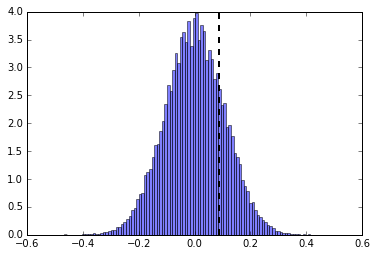

In [27]:
n, bins, patches = plt.hist(planets_mean, bins =100, normed=1.0, facecolor='blue', alpha=0.5)
values, base = np.histogram(planets_mean, bins = 100)
plt.axvline(ori_mean_planets, color='k', linestyle='dashed', linewidth=2)

In [28]:
compare_statistics(values,base,ori_mean_planets,alpha = 0.05)

Area total                 = 1.0
Area statistic (shuffling) = 0.21418
Area p_value               = 0.05


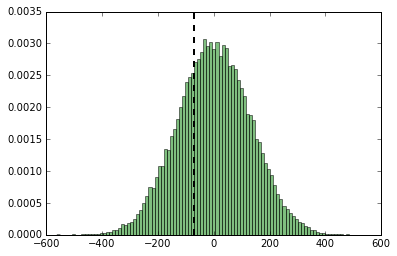

In [29]:
n, bins, patches = plt.hist(efficiency_mean, bins =100, normed=1.0, facecolor='green', alpha=0.5)
values, base = np.histogram(efficiency_mean, bins = 100)
plt.axvline(ori_mean_efficiency, color='k', linestyle='dashed', linewidth=2)

In [30]:
compare_statistics(values,base,ori_mean_efficiency,alpha = 0.05)

Area total                 = 1.0
Area statistic (shuffling) = 0.26798
Area p_value               = 0.05


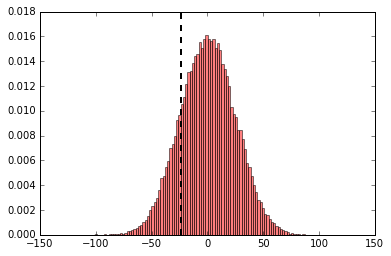

In [31]:
n, bins, patches = plt.hist(mass_mean, bins =100, normed=1.0, facecolor='red', alpha=0.5)
values, base = np.histogram(mass_mean, bins = 100)
plt.axvline(ori_mean_mass, color='k', linestyle='dashed', linewidth=2)

In [32]:
compare_statistics(values,base,ori_mean_mass,alpha = 0.05)

Area total                 = 1.0
Area statistic (shuffling) = 0.16834
Area p_value               = 0.05


# Conclusion 
As the hiphotesis to probe were:

    Ho: 'There is not difference between sets'
    RHo: 'There is difference between sets'
    
In all variables we can't reject the hypothesis null with a least 5 % of significance. We can say that there is a statistical difference between sets.